<font color='darkgreen' size='5' face='verdana'>**Case Study Analysis: "Prediction and Probabilistic Analysis of Flood Occurrence in Kerala"**</font>



<font color='BLUE' size='5'><b>INTRODUCTION:</b></font>

<font color='navy'>**PROBLEM STATEMENT**</font>
The challenge of predicting floods using historical rainfall data.The importance of this task for disaster management and mitigation


- Flooding is a natural disaster that poses significant challenges to communities and regions worldwide. The ability to predict and anticipate floods is crucial for effective disaster management and mitigation efforts. Historical rainfall data serves as a valuable resource for developing predictive models that can help identify areas at risk of flooding. 
- The state of Kerala, situated in the southwestern part of India, is known for its diverse landscape and rich biodiversity. However, Kerala also faces the recurring challenge of floods during the monsoon season, which often lead to significant human and economic losses. To address this issue, it is essential to understand historical rainfall patterns and their correlation with flood occurrences.

<font color='blue' size='5'><b>OBJECTIVE:</b></font>
- Goal: Predict whether a flood will occur based on rainfall data.
- Keeping different conditions in rainfall scenarios (conditional probability) understand the rate of flooding.
- Objective: Develop a predictive model using machine learning techniques.
- Evaluation Metric: Specify the evaluation metric (e.g., accuracy, precision, recall, F1-score) for assessing model performance.

<font color='green' size='5' face='verdana'>**UNDERSTANDING THE RELATIONSHIP BETWEEN PRECIPITATION CHARACTERISTICS AND FLOOD OCCURENCE**</font>

The amount, intensity, duration, and spatial distribution of precipitation all have an impact on the properties of floods. Thus, short-duration, high-intensity storms or extended, low-intensity rainfall can cause floods. The majority of this research has been conducted in tiny catchments in Mediterranean climates that are either hyper-arid or have quite significant rainfall. September, October, December, and May are the wetter months of the year, and these are also the months when most floods are likely to happen—May, June, or September. Floods are also more strongly correlated with the overall amount of rain that falls during a rainy spell than with its intensity. It is challenging to draw broad conclusions about the significance of rainfall intensity for the creation of floods because the complexity of storm rainfall grows with storm total.

<font color='green' size='5' face='verdana'>**IMPORTING REQUIRED LIBRARIES**</font>

In [4]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

In [5]:
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization

In [6]:
import warnings
warnings.filterwarnings("ignore") # Ignore warnings 

###### from scikit-learn 

In [7]:
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables

In [8]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

In [9]:
from sklearn.preprocessing import StandardScaler  # For standardizing features

In [10]:
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search

In [11]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier

In [13]:
from sklearn.svm import SVC  # Support Vector Machine classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# For evaluating 

In [16]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier

In [80]:
from sklearn.metrics import make_scorer # create a custom scorer 

<font color='green' size='5' face='verdana'>**LOAD THE DATASET**</font>

In [17]:
flood = pd.read_csv("kerala.csv.xls")

In [18]:
flood

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


<font color='green' size='5' face='verdana'>**MAKING A COPY OF THE DATASET**</font>

In [19]:
flood_copy = flood.copy()
flood_copy

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [20]:
# save data frame to new df for dashboard creating
flood.to_csv('KERALA_FLOOD.csv', index=False)

<font color='green' size='5' face='verdana'>**ABOUT THE DATASET**</font>

<font color='lightnavy' size='3'>**The dataset contains the monthly rainfall data from years 1901 to 2018 for the Indian state of Kerala. Kerala is one of the few states which are usually badly hit by monsoons every year.The dataset comprises monthly rainfall measurements in millimeters for each year, enabling us to assess the variability and intensity of precipitation throughout the monsoon season. Furthermore, the annual rainfall summaries provide insights into the overall climatic conditions and potential deviations from the long-term average.**</font>

In [21]:
print("THE NUMBER OF ROWS AND COLUMNS: ",flood.shape)
print("THE TOTAL NUMBER OF ELEMENTS IN THE DATASET: ",flood.size)

THE NUMBER OF ROWS AND COLUMNS:  (118, 16)
THE TOTAL NUMBER OF ELEMENTS IN THE DATASET:  1888


    Takeaway:
       - there is 1888 elements in the dataset with 118 rows and 16 columns

<font color='green' size='5' face='verdana'>**UNDERSTANDING THE FEATURES**</font>

In [22]:
print("COLUMN NAMES : \n ",flood.columns)

COLUMN NAMES : 
  Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')


**The data contains 32561 instances with the following attributes:**
- 'SUBDIVISION' : Represents the geographical subdivision associated with the data.
- 'YEAR' : Represents the calendar year for which the data is recorded.
- 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC' : Monthly rainfall data for each respective month.
- ' ANNUAL RAINFALL' : Represents the total annual rainfall for the given year.
- 'FLOODS' : Binary variable indicating the occurrence of floods.

                        "YES" indicates that floods occurred.
                        "NO" indicates the absence of floods.                             

<font color='green' size='5' face='verdana'>**RENAMING THE COLUMN**</font>

In [23]:
flood.rename(columns={" ANNUAL RAINFALL":"ANNUAL RAINFALL"},inplace=True)

In [24]:
flood.sample(3)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
89,KERALA,1990,14.9,4.8,18.0,41.8,488.5,528.6,635.4,370.8,103.3,323.2,158.8,5.2,2693.1,NO
36,KERALA,1937,6.5,21.2,58.7,175.5,137.1,485.6,970.5,281.2,139.8,401.9,121.0,19.1,2818.2,NO
80,KERALA,1981,7.0,6.8,28.5,75.9,166.3,912.4,489.8,495.6,376.6,265.0,138.6,43.3,3005.9,YES


<font color='green' size='5' face='verdana'>**HAVE A LOOK AT THE DATASET**</font>

In [25]:
flood.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [26]:
flood.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [27]:
flood.dtypes

SUBDIVISION         object
YEAR                 int64
JAN                float64
FEB                float64
MAR                float64
APR                float64
MAY                float64
JUN                float64
JUL                float64
AUG                float64
SEP                float64
OCT                float64
NOV                float64
DEC                float64
ANNUAL RAINFALL    float64
FLOODS              object
dtype: object

- rainfall over different months and annual is recorded in float64,subdivision and flood in object and year in int64

<font color='green' size='5' face='verdana'>**BASIC CLEANING**</font>

<font color='green' size='3'>**CHECKING FOR MISSING VALUES AND DUPLICATES**</font>

In [28]:
print("THE NUMBER OF MISSING VALUES : \n  ",flood.isna().sum())

THE NUMBER OF MISSING VALUES : 
   SUBDIVISION        0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL RAINFALL    0
FLOODS             0
dtype: int64


In [29]:
print("THE NUMBER OF DUPLICATES : \n",flood.duplicated().sum())

THE NUMBER OF DUPLICATES : 
 0


<font color='LIGHTBLUE' size='5' face='verdana'>**TAKE AWAY:**</font>

    - The dataset is cleaned,that is it doesn't contain missing values and duplicates.

<font color='green' size='5' face='verdana'>**CHECKING UNIQUE VALUES OF EACH COLUMN**</font>

<font color='navy' size='4'>**CHECKS WHETHER THE DATASET CONTAINS ANY SPECIAL CHARACTERS?**</font>

In [30]:
cols=flood.columns

In [31]:
for col in cols:
    print("{} : {}".format(cols,flood[col].unique()))

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object') : ['KERALA' 'KERALA ']
Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object') : [1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914
 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942
 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]
Index(['SUBDIVISION', 'YEAR',

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

    - Values in each feature doen't contains any special characters.

<font color='green' size='5' face='verdana'>**EXPLORATORY DATA ANALYSIS**</font>

<font color='navy' size='4'>**VISUALISATION**</font>

<font color='brown' size='3'>**UNIVARIABLE ANALYSIS**</font>

<font color='darkviolet' size='3' >**CATEGORICAL FEATURES**</font>

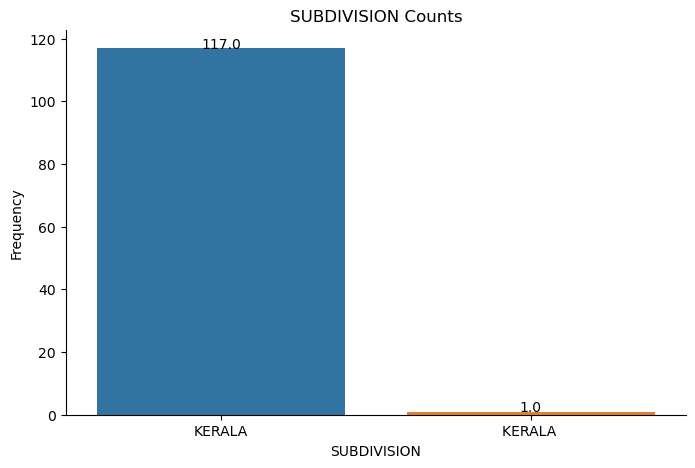

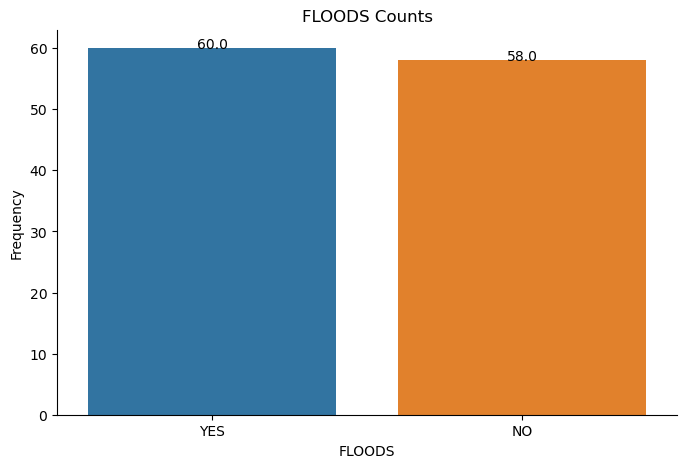

In [32]:
categorical_features = flood.select_dtypes(include="object").columns

for feature in categorical_features:
    plt.figure(figsize=(8,5))
    
    sns.countplot(x=feature, data=flood, order=flood[feature].value_counts().index)
   
    for p in plt.gca().patches: # gca:get current axis
        plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center')
        # p.get_x(): Get the x-coordinate of the left side of the bar
        # p.get_width(): Get the width of the bar
        # p.get_height(): Get the height of the bar
        # f'{p.get_height()}': Format the height value as a string to display in the plot
        
    plt.title(f'{feature} Counts')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    sns.despine()  # remove the spines
    plt.show()


<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>
- The number of subdivisions in Kerala seems to be increasing over time.
- There are 60 instances where floods occurred.
- There are 58 instances where floods did not occur.

<font color='darkviolet' size='3' >**NUMERICAL FEATURES**</font>

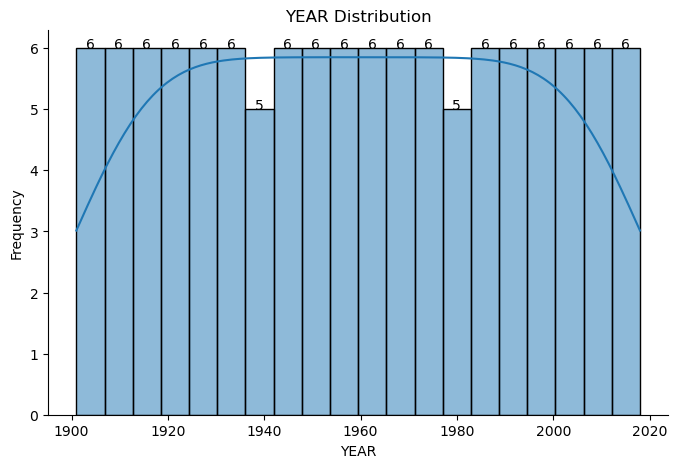

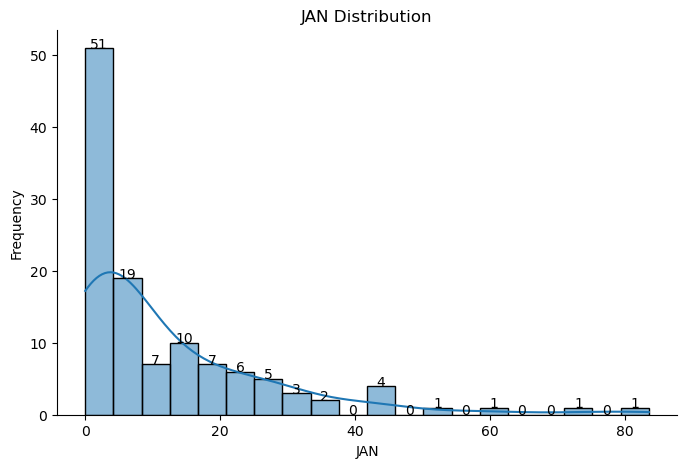

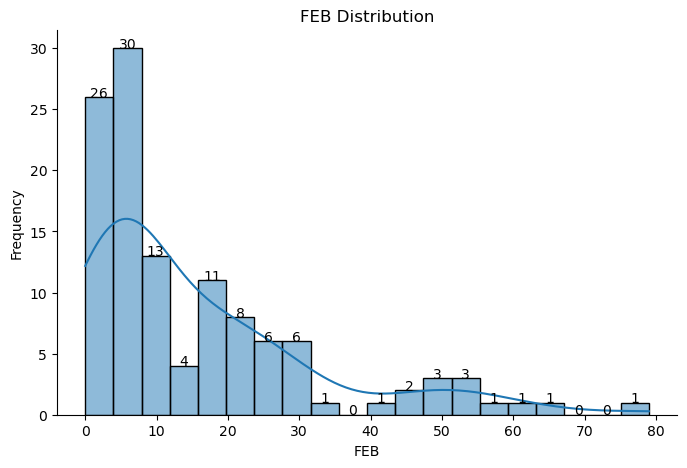

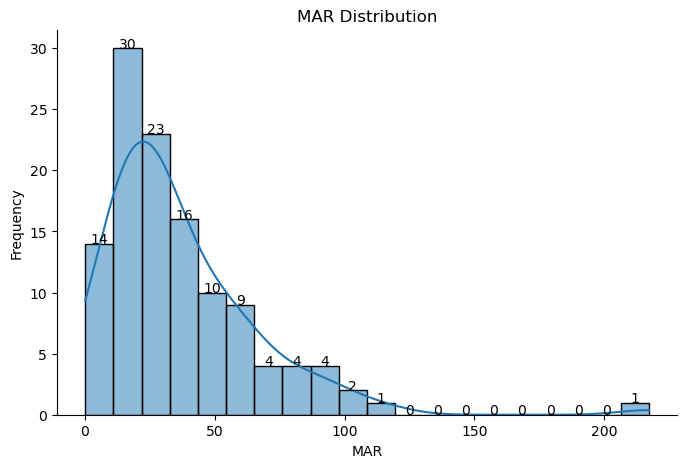

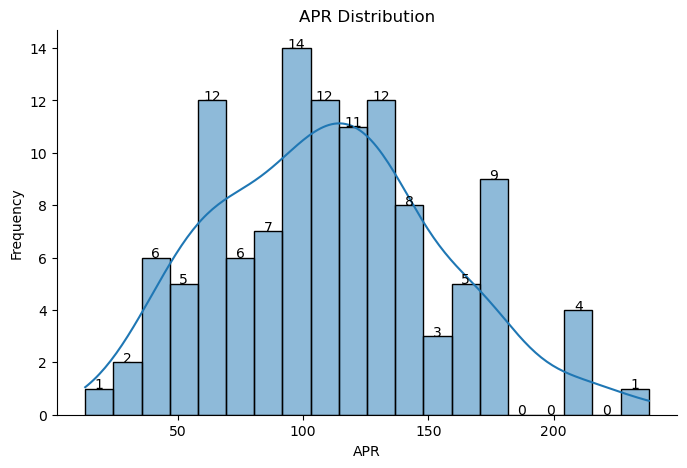

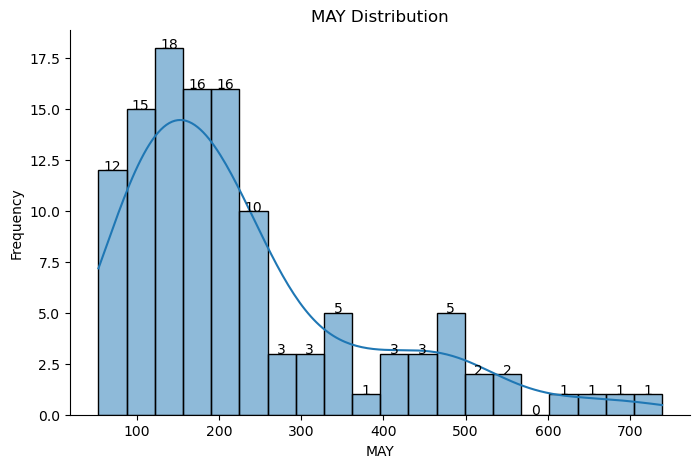

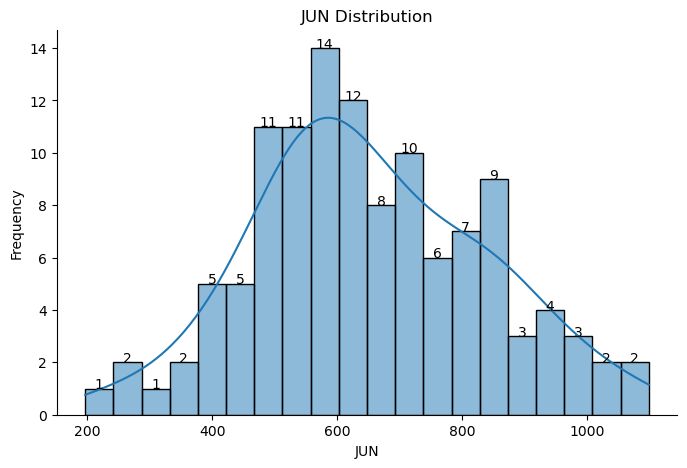

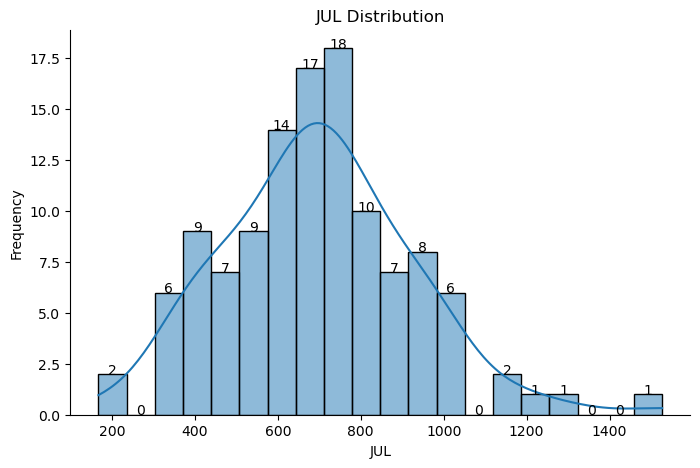

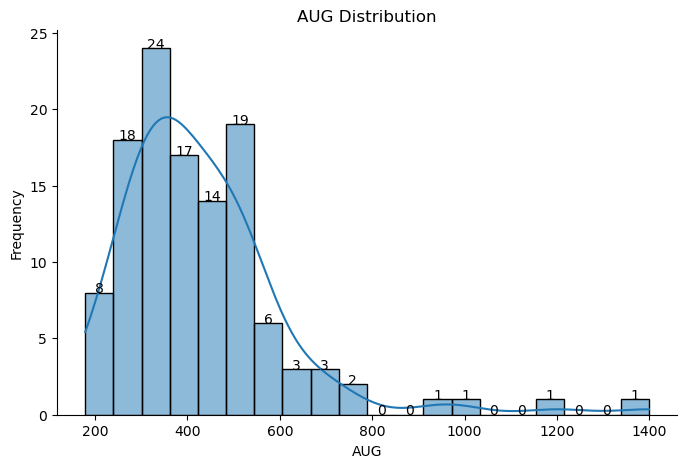

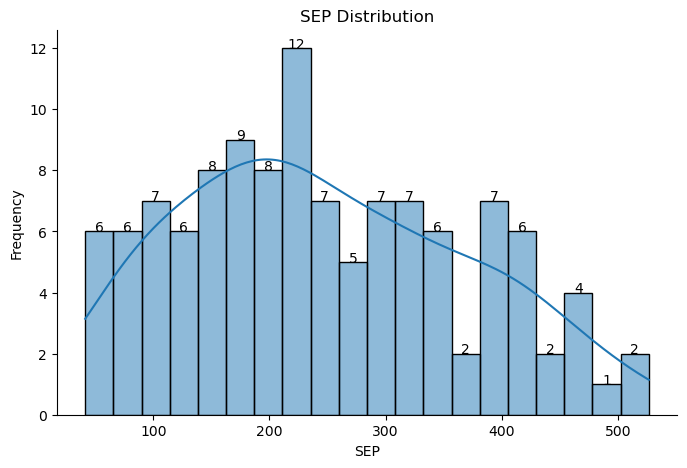

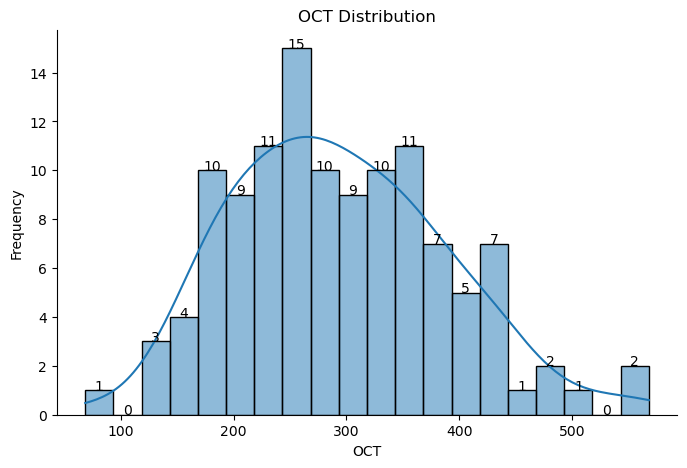

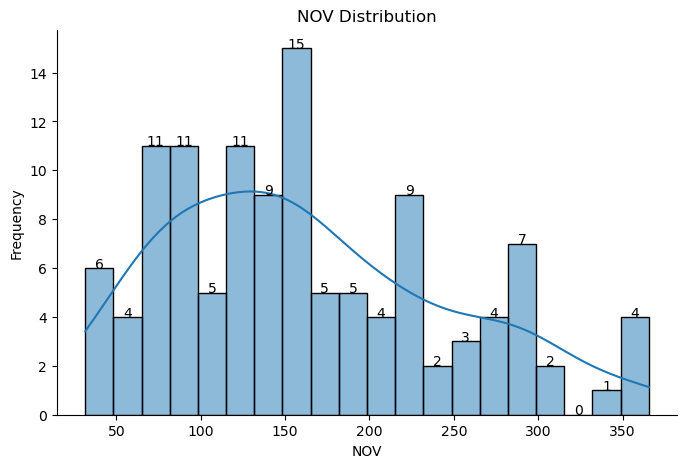

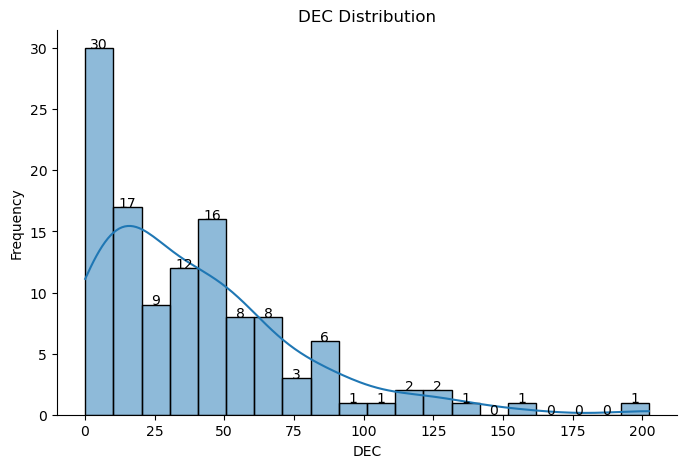

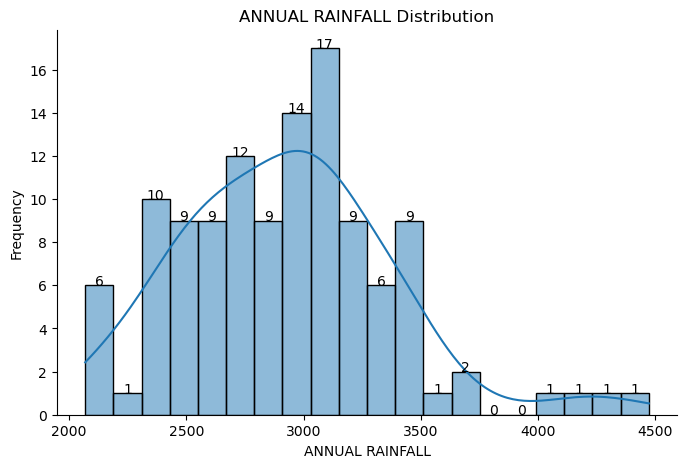

In [33]:
numerical_features = flood.select_dtypes(include=['int64','float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    
    sns.histplot(flood[feature], bins=20, kde=True)
    
    for p in plt.gca().patches: # gca:get current axis
        plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center')
        
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    sns.despine()  # remove the spines
    plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- Shows the distribution rainfall according to year,month and annualy.
- From annual rainfall distribution, the average annual rainfall falls between 2,000 and 4,500 millimeters. The most frequent range appears to be between 2,500 and 3,500 millimeters.
- For June and July being the monsoon months in kerala the rainfall avg falls between 600 and 700
- Average annual rainfall per year falls in the range of 3000
- January,February,March,December have seen least rainfall


<font color='brown' size='3' >**MULTIVARIABLE ANALYSIS**</font>

<font color='darkviolet' size='3'>**RELATION BETWEEN FEATURES**</font>

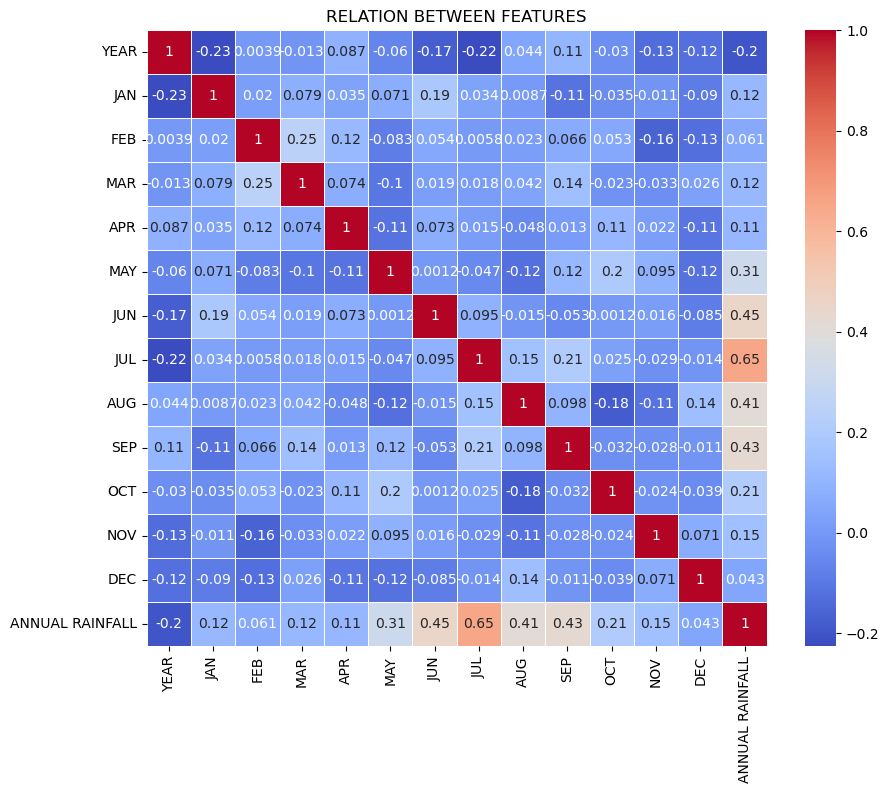

In [34]:
plt.figure(figsize=(10, 8))
correlation_matrix = flood.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('RELATION BETWEEN FEATURES')
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- 'JUNE',"JULY" and "AUGUST" show positive correlations with "ANNUAL RAINFALL," indicating that higher rainfall in these months contributes to a higher annual total, which is expected as these months are typically part of the monsoon season.
- May shows a positive correlation with other months but doesn't have a strong association with annual rainfall.
- February is associated with lower annual rainfall.

<font color='darkviolet' size='3'>**ANNUAL RAINFALL OVER THE YEARS**</font>

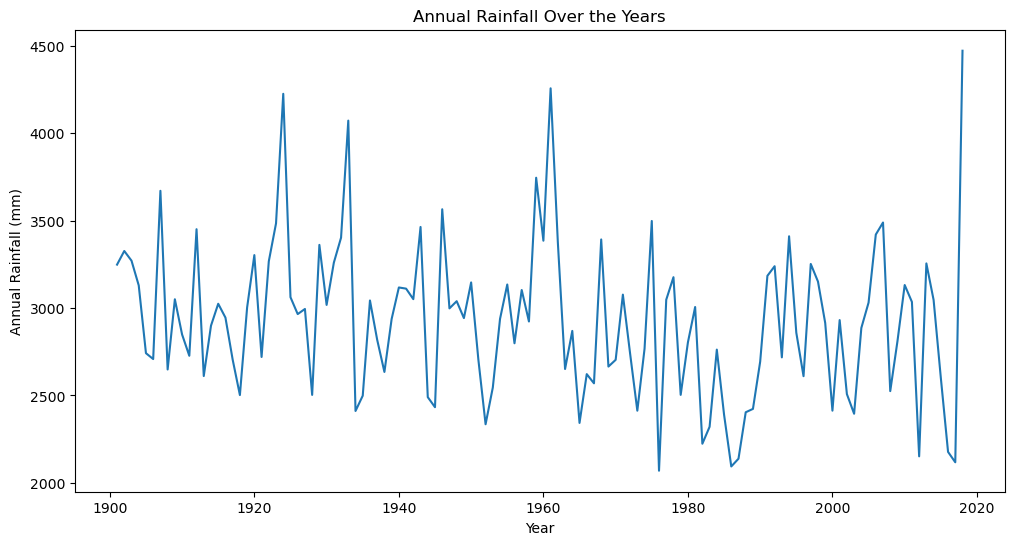

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(flood['YEAR'], flood['ANNUAL RAINFALL'])
plt.title('Annual Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- There seems to be an increasing trend in annual rainfall over a long period of time. This could be due to various factors, like climate change or natural cycles.
-  Some years experience higher rainfall than others.
- The year 1900 appears to have the least amount of rainfall, with most months receiving less than 2.5 units.
- The rainfall amount appears to be more evenly distributed in several years, such as 1940, 1980, and 2000.
- The year 2020 seems to have the highest amount of rainfall, with several months receiving more than 150 units.

<font color='brown' size='3'>**MAXIMUM AND MINIMUM RAINFALL OCCURED**</font>

In [36]:
flood.loc[flood['ANNUAL RAINFALL'].idxmax()]


SUBDIVISION        KERALA
YEAR                 2018
JAN                  29.1
FEB                  52.1
MAR                  48.6
APR                 116.4
MAY                 183.8
JUN                 625.4
JUL                1048.5
AUG                1398.9
SEP                 423.6
OCT                 356.1
NOV                 125.4
DEC                  65.1
ANNUAL RAINFALL    4473.0
FLOODS                YES
Name: 117, dtype: object

In [38]:
flood[flood['ANNUAL RAINFALL']== 4473]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [39]:
flood.loc[flood['ANNUAL RAINFALL'].idxmin()]

SUBDIVISION        KERALA
YEAR                 1976
JAN                   0.1
FEB                   1.5
MAR                  21.0
APR                 134.5
MAY                  75.8
JUN                 196.8
JUL                 641.5
AUG                 342.6
SEP                 116.2
OCT                 221.3
NOV                 286.7
DEC                  30.8
ANNUAL RAINFALL    2068.8
FLOODS                 NO
Name: 75, dtype: object

In [41]:
flood[flood['ANNUAL RAINFALL']== 2068.8]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
75,KERALA,1976,0.1,1.5,21.0,134.5,75.8,196.8,641.5,342.6,116.2,221.3,286.7,30.8,2068.8,NO


<font color='LIGHTBLUE' size='5' face='verdana'>**TAKE AWAY:**</font>

- Annual Rainfall in 2018 was 4473 which was the great flood occured among the century which result in the death over many people and missing.
- Annual Rainfall in 1976 was 2068.8 which was the year where flood doesn't occured.


<font color='darkviolet' size='3'>**AVERAGE ANNUAL RAINFALL FOR FLOODS**</font>

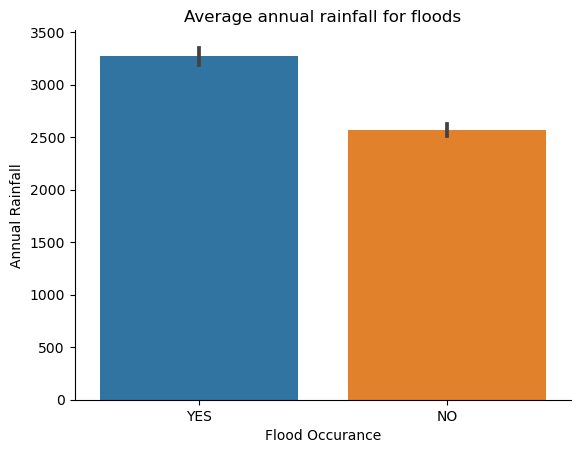

In [42]:
sns.barplot(x="FLOODS",y="ANNUAL RAINFALL", data=flood)  
plt.xlabel("Flood Occurance")
plt.ylabel("Annual Rainfall")
plt.title("Average annual rainfall for floods")
sns.despine()  # remove the spines
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- INCREASE IN RAINFALL LEAD TO THE OCCURRENCE OF FLOOD 

<font color='navy' size='4'>**WHAT ABOUT THE OUTLIERS?**</font>

<font color='brown' size='3'>**IDENTIFY OUTLIERS USING IQR METHODS AND VISUALIZE USING BOX PLOTS**</font>

In [43]:
Q1 = flood.quantile(0.25)
Q3 = flood.quantile(0.75)

In [44]:
IQR = Q3 - Q1

In [45]:
outliers = ((flood < (Q1 - 1.5 * IQR)) | (flood > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_count = outliers.sum()
print(f"Number of outliers: {outliers_count}")

Number of outliers: 41


<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- There are 41 outliers in this dataset

<font color='darkviolet' size='3'>**DISPLAYING OUTLIERS IN THE DATASET**</font>

In [46]:
flood[outliers]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,YES
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,YES
13,KERALA,1914,0.7,6.8,18.1,32.7,164.2,565.3,857.7,402.2,241.0,374.4,100.9,135.2,2899.1,NO
16,KERALA,1917,2.9,47.6,79.4,38.1,122.9,703.7,342.7,335.1,470.3,264.1,256.4,41.6,2704.8,NO
17,KERALA,1918,42.9,5.0,32.8,51.3,683.0,464.3,167.5,376.0,96.4,233.2,295.4,54.1,2501.9,NO
18,KERALA,1919,43.0,6.1,33.9,65.9,247.0,636.8,648.0,484.2,255.9,249.2,280.1,53.0,3003.3,YES
20,KERALA,1921,43.0,4.7,15.0,171.3,104.1,489.1,639.8,641.9,156.7,302.4,136.2,15.8,2719.9,NO
22,KERALA,1923,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6,3484.7,YES
23,KERALA,1924,19.3,2.9,66.6,111.0,185.4,1011.7,1526.5,624.0,289.1,176.5,162.9,50.4,4226.4,YES


In [47]:
flood[outliers].shape

(41, 16)

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

The dataset is limited to 118 rows,so removing outliers may lead to a very poor dataset.

<font color='darkviolet' size='3'>**VISUALIZING THE OULIERS WITH THE HELP OF BOXPLOTS**</font>

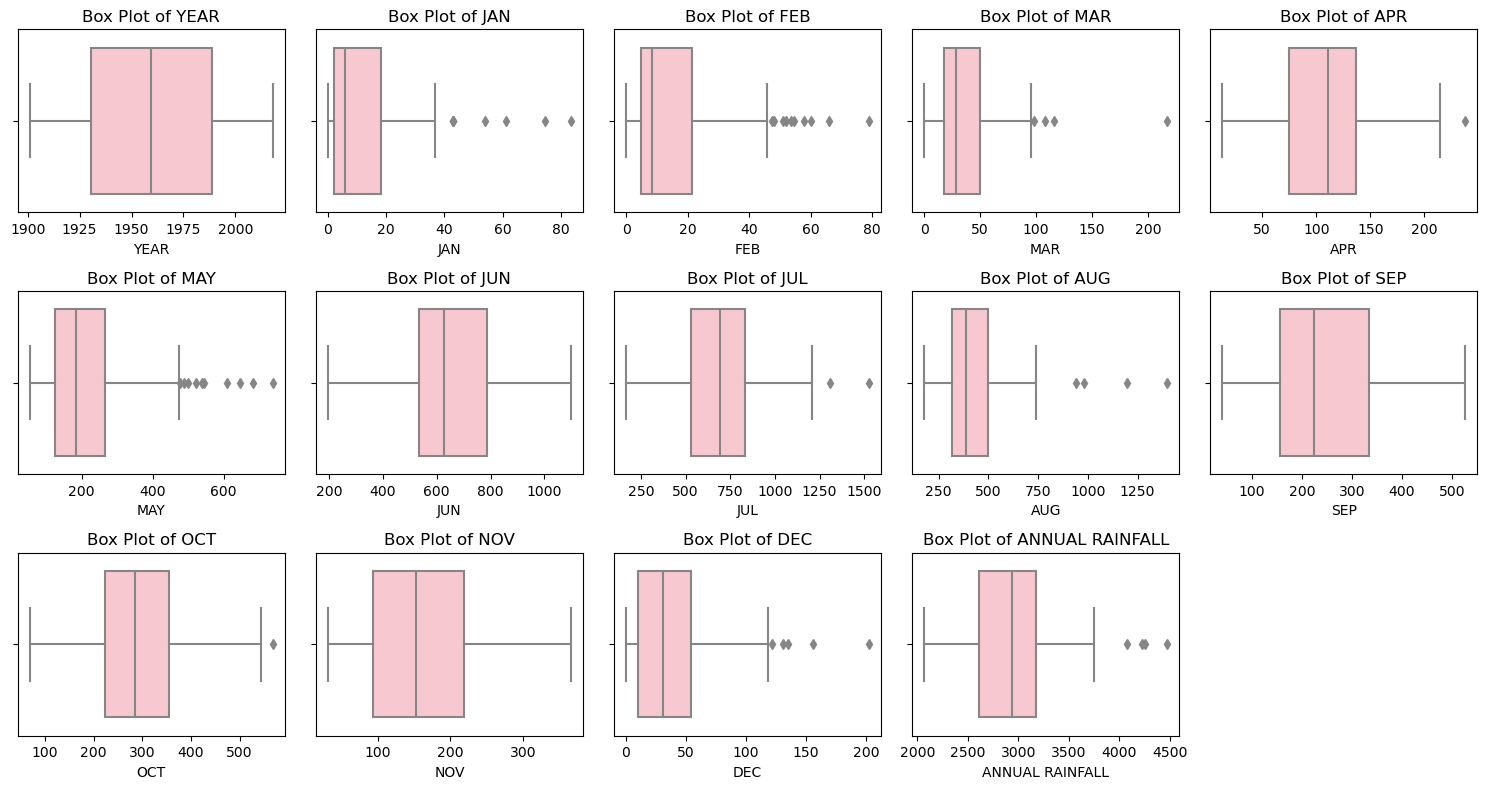

In [48]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=flood[feature], color='pink')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

<font color='green' size='5' face='verdana'>**CONDITIONAL PROBABILITY**</font>

In [49]:
flood_kerala=flood.copy()

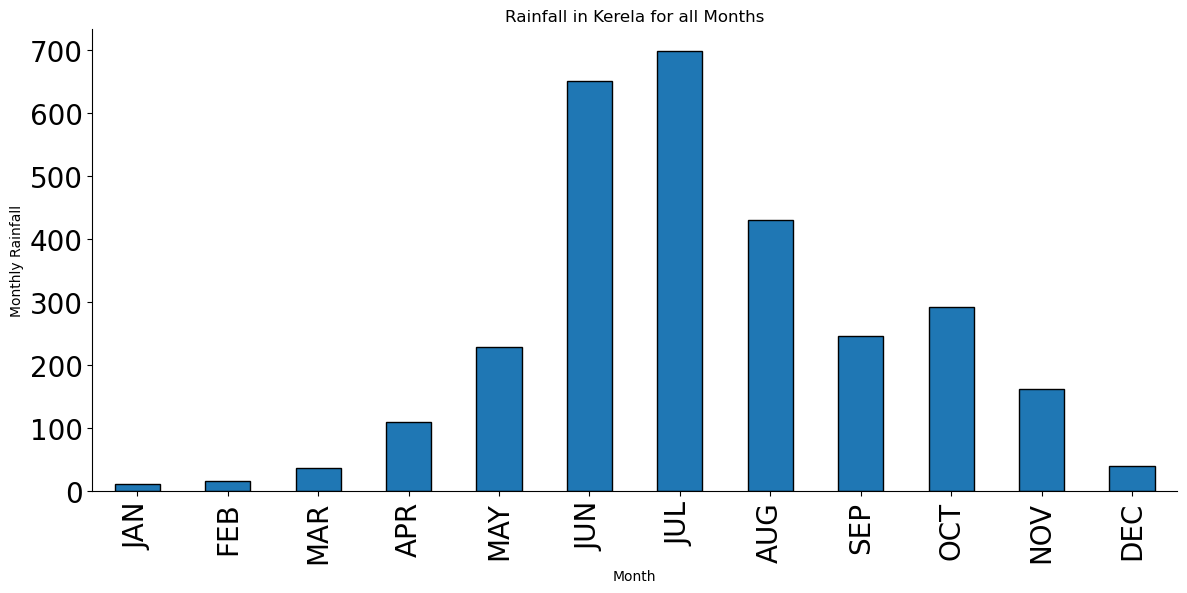

In [50]:
ax = flood[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(edgecolor='k',align='center',linewidth=1,figsize=(14,6))
        
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.title('Rainfall in Kerela for all Months')
ax.tick_params(labelsize=20)
sns.despine()  # remove the spines
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- Kerala experiences high temperatures and humidity during the`march`,`april`,`may` (summer months). The temperatures can range from warm to hot, and this period often sees the arrival of the southwest monsoon.
- Kerala receives the highest rainfall mostly in the months `june` and `july`,`august`and continues through `September`, which is expected as these months are typically part of the monsoon season. 
- The post-monsoon season (`oct`,`nov`) is characterized by gradually reducing rainfall and more moderate temperatures. The weather becomes relatively pleasant during these months.
- Winter (`dec`,`jan`,`feb`) in Kerala is characterized by cooler and drier weather. While temperatures are not extremely low, the climate is more comfortable, making it a popular time for tourism.



<font color='brown' size='3'>Finding chances of getting during the months June, July, August and September when the rainfall is greater than 500mm**</font>

- Since we are only interested in knowing the rainfall in the months June, July, August and September since they are the monsoon months which may lead to higher chances of rainfall. 
- probability of flooding in a year given that it rained more than a threshold (500 mm) in these months. We needed to create more features in order to find these probabilities.

In [52]:
flood_kerala['JUN_GT_500'] = (flood_kerala['JUN'] > 500).astype('int')
flood_kerala['JUL_GT_500'] = (flood_kerala['JUL'] > 500).astype('int')
flood_kerala['AUG_GT_500'] = (flood_kerala['AUG'] > 500).astype('int')
flood_kerala['SEP_GT_500'] = (flood_kerala['SEP'] > 500).astype('int')

In [53]:
df_small = flood_kerala.loc[:,['YEAR','JUN_GT_500','JUL_GT_500','AUG_GT_500','SEP_GT_500','FLOODS']]
df_small

,YEAR,JUN_GT_500,JUL_GT_500,AUG_GT_500,SEP_GT_500,FLOODS
0,1901,1,1,0,0,YES
1,1902,0,1,0,0,YES
2,1903,1,1,0,0,YES
3,1904,1,1,0,0,YES
4,1905,1,1,0,0,NO
...,...,...,...,...,...,...
113,2014,0,1,1,0,YES
114,2015,1,0,0,0,NO
115,2016,1,0,0,0,NO
116,2017,0,0,1,0,NO


<font color='darkviolet' size='3'>**MONTH: JUNE**</font>

    P(A) = Probability of Flooding
    P(B) = Probaility of having more than 500 mm rain in June
    p(AnB) = Probabiity of flooding and having more than 500mm rain in June
    P(A|B) = Probabiity of flooding given it rained more than 500 mm in June

In [54]:
pd.crosstab(df_small['FLOODS'],df_small['JUN_GT_500'],margins=True)

JUN_GT_500,0,1,All
FLOODS,,,
NO,19,39,58
YES,6,54,60
All,25,93,118


    P(A) = (6+54)/(19+39+6+54)
         = 0.5084745762711864
    P(B) = (39+54)/(19+39+6+54)
         = 0.788135593220339
    P(AnB) = (54)/(19+39+6+54)
           = 0.4576271186440678
    P(A|B) = P(AnB)/P(B)
           = 0.4576271186440678 / 0.788135593220339
           = 0.5806451612903226

- CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 58% IN THE MONTH JUNE.

<font color='darkviolet' size='3'>**MONTH: JULY**</font>

In [55]:
pd.crosstab(df_small['FLOODS'],df_small['JUL_GT_500'],margins=True)

JUL_GT_500,0,1,All
FLOODS,,,
NO,19,39,58
YES,3,57,60
All,22,96,118


    P(A) = Probability of Flooding
    P(B) = Probaility of having more than 500 mm rain in July
    p(AnB) = Probabiity of flooding and having more than 500mm rain in July
    P(A|B) = Probabiity of flooding given it rained more than 500 mm in July


    P(A) = (3+57)/(19+39+6+54)
         = 0.5084745762711864
    P(B) = (39+57)/(19+39+6+54)
         = 0.8135593220338984
    P(AnB) = (57)/(19+39+6+54)
           = 0.4830508474576271
    P(A|B) = P(AnB)/P(B)
           = 0.4830508474576271 / 0.8135593220338984
           = 0.59375

- CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 59% IN THE MONTH JULY.

<font color='darkviolet' size='3'>**MONTH: AUGUST**</font>

In [56]:
pd.crosstab(df_small['FLOODS'],df_small['AUG_GT_500'],margins=True)

AUG_GT_500,0,1,All
FLOODS,,,
NO,47,11,58
YES,41,19,60
All,88,30,118


    P(A) = Probability of Flooding
    P(B) = Probaility of having more than 500 mm rain in August.
    p(AnB) = Probabiity of flooding and having more than 500mm rain in August.
    P(A|B) = Probabiity of flooding given it rained more than 500 mm in August.

    P(A) = (41 + 19) / 118
         = 0.5084745762711864
    P(B) = (11 + 19) / 118
         = 0.2542372881355932
    P(AnB) = 19 / 118
           = 0.16101694915254236
    P(A|B) = P(AnB) / P(B)
           = 0.16101694915254236 / 0.2711864406779661
           = 0.6333333333333333

- CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 63% IN THE MONTH AUGUST.

<font color='darkviolet' size='3'>**MONTH: SEPTEMBER**</font>

In [57]:
pd.crosstab(df_small['FLOODS'],df_small['SEP_GT_500'],margins=True)

SEP_GT_500,0,1,All
FLOODS,,,
NO,58,0,58
YES,58,2,60
All,116,2,118


    P(A) = Probability of Flooding
    P(B) = Probaility of having more than 500 mm rain in September.
    p(AnB) = Probabiity of flooding and having more than 500mm rain in September.
    P(A|B) = Probabiity of flooding given it rained more than 500 mm in September.

    P(A) = (58+60)/118
         = 1.0
    P(B) = (60+2)/118
         = 0.5254237288135594
    P(AnB) = (60)/118
           = 0.5084745762711864
    P(A|B) = P(AnB) / P(B)
           = 0.5084745762711864/ 0.5254237288135594
           = 0.9677419354838709

- CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 96% IN THE MONTH SEPTEMBER.

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- The probability of floods tends to increase with higher rainfall, and `September` has the highest likelihood among the June,July and August months when the rainfall exceeds 500 mm.


<font color='navy' size='4'>**RAINFALL OVER THE MONTHS:JUNE,JULY ,AUGUST AND SEPTEMBER**</font>

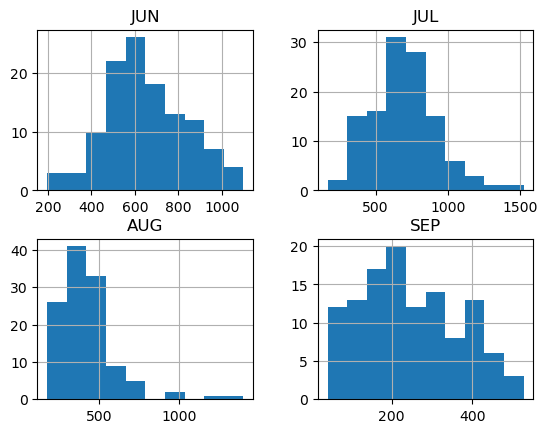

In [58]:
c = flood[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

<font color='green' size='5' face='verdana'>**MODEL IMPLEMENTATION**</font>

<font color='navy' size='4'>**CONVERTING CATEGORICAL DATAS TO NUMERICAL**</font>

In [64]:
label_encoder = LabelEncoder()

In [65]:
categorical_cols = flood.select_dtypes(include='object').columns

In [66]:
for col in categorical_cols:
        flood[col] = label_encoder.fit_transform(flood[col])

In [67]:
flood.sample(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
86,0,1987,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,157.0,272.1,216.0,131.1,2137.6,0
96,0,1997,2.1,1.5,36.1,60.6,133.6,544.2,970.5,536.0,292.2,288.9,298.4,88.4,3252.4,1
100,0,2001,16.5,28.3,7.0,238.0,238.6,715.3,598.5,361.3,216.8,319.6,181.0,10.1,2931.1,0
22,0,1923,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6,3484.7,1
97,0,1998,6.0,2.1,8.1,61.1,151.6,732.5,641.4,371.8,517.6,444.8,135.0,79.4,3151.5,1


<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

Now the target feature (categorical data) is changed to a numerical value by the label encoder.

<font color='navy' size='4'>**SEPARATE INDEPENDENT VARIABLE (X) AND TARGET (y) VARIABLE**</font>

    TARGET VARIABLE : `FLOODS`
    Here,
        X: independent variable
        y: dependent variable(target)

In [68]:
X = flood.drop(['SUBDIVISION','FLOODS'], axis=1)
y = flood['FLOODS']

In [69]:
X

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1


In [70]:
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int32

<font color='navy' size='4'>**SPLIT THE DATASET INTO TRAINING AND TESTING SETS**</font>

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font color='navy' size='4'>**CHECKING WHETHER THE TARGET VARIABLE IS BALANCED OR NOT**</font>

In [72]:
flood["FLOODS"].value_counts()

1    60
0    58
Name: FLOODS, dtype: int64

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

The data is balanced.

<font color='navy' size='4'>**CHECKS WHETHER DATASET NEEDS TO BE STANDARDIZED**</font>

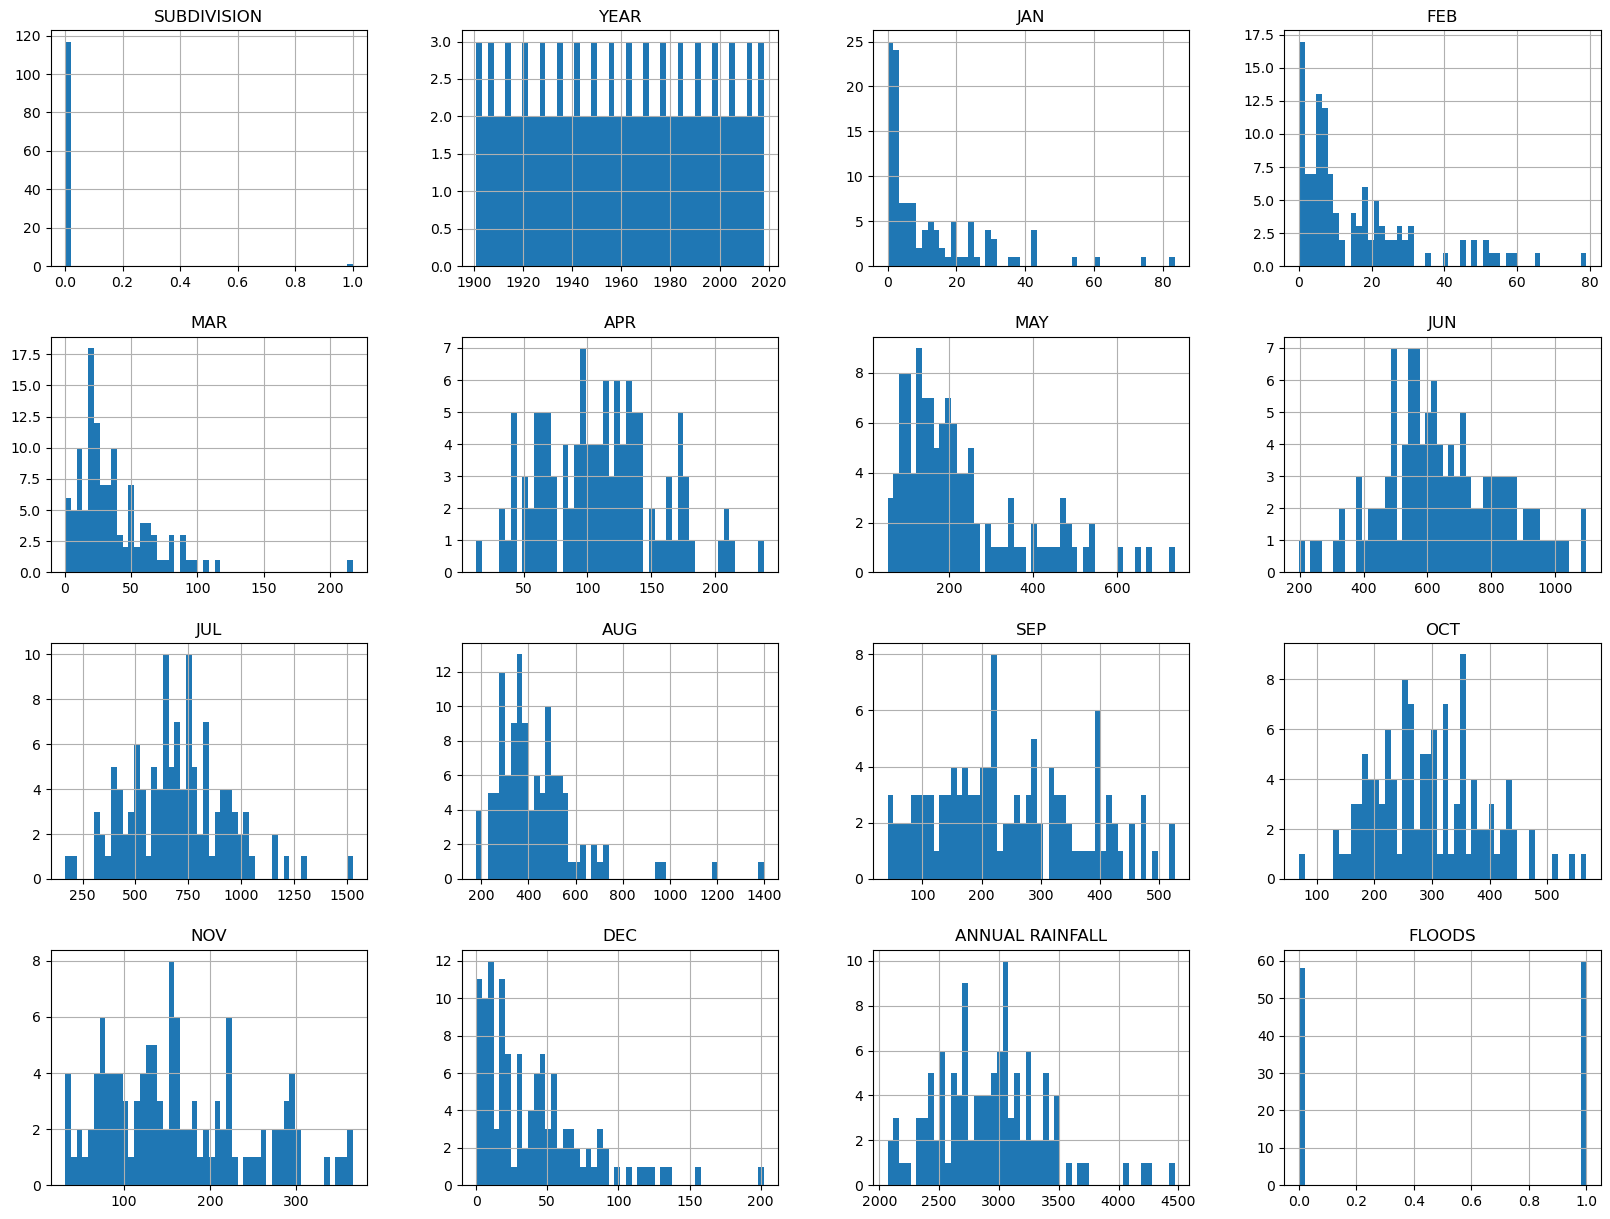

In [73]:
flood.hist(bins = 50,figsize=(20,15))
plt.show()


<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

It looks like those values are scattered,so while scaling them, they end up ranging from 0 to 1.

<font color='navy' size='4'>**SCALE DATA USING STANDARDSCALER**</font>

In [74]:
scaler = StandardScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X_train_scaled

array([[-0.4233356 , -0.51192874, -0.40716891, ...,  1.20595256,
        -0.62038625, -1.06400437],
       [-1.37790343, -0.60039952, -0.68005608, ..., -0.63329382,
         0.24438857, -0.67840643],
       [-1.2884127 , -0.81136832, -0.52909722, ..., -0.33330978,
        -0.90346002,  0.04458971],
       ...,
       [ 1.00851614, -0.81136832,  0.05151378, ..., -0.09356844,
         0.25683137, -0.44735027],
       [-0.21452389, -0.45748518,  1.81657124, ..., -1.37464781,
         0.90074643, -1.27495929],
       [ 1.30681859, -0.7637302 ,  1.97333621, ..., -1.04515715,
        -0.87857441, -1.14505775]])

In [77]:
X_test_scaled

array([[-6.53726639e-02, -7.29702978e-01, -5.29961960e-02,
        -3.96670048e-01, -9.00982135e-01,  1.05432679e+00,
         1.28889497e+00,  5.49115522e-01, -3.95423446e-01,
        -1.68201600e+00, -1.20807465e-01,  3.82225909e-01,
        -2.81319864e-01,  3.86094606e-01],
       [ 9.19025411e-01,  2.02642984e-01, -7.03280521e-01,
        -6.43816282e-01, -1.51637472e+00,  1.77762032e+00,
        -6.28651885e-01, -2.88517116e-01, -3.33264851e-01,
        -1.18299395e+00,  3.55115681e-01, -3.20963038e-02,
        -1.01855594e+00, -5.00521282e-01],
       [-1.61654539e+00, -7.29702978e-01,  3.12788737e-01,
        -9.19849738e-01, -1.27407657e-01,  2.59580211e-01,
         1.16716369e+00, -7.69977797e-01, -7.33151812e-01,
        -2.66242138e-01,  1.02096639e+00, -1.06974600e+00,
        -1.17409098e+00, -3.95692246e-01],
       [-3.93505355e-01, -6.88870308e-01, -6.68443861e-01,
         2.25774470e+00,  6.07163066e-01, -9.55795593e-01,
         1.55134315e+00, -1.36410739e-01,  1.

<font color='green' size='5' face='verdana'>**MODEL SELECTION**</font>

<font color='brown' size='3'>**LOGISTIC REGRESSION :** </font>

       Logistic regression is a regression analysis used for predicting binary outcomes, utilizing a sigmoid curve to model class membership. It's commonly used for classification tasks in linearly separable classes.
<font color='brown' size='3'>**SUPPORT VECTOR MACHINE  :**</font>

     Support Vector Machine (SVM) is a powerful supervised machine learning algorithm for classification, regression, and outlier detection. It uses kernel functions to find the best hyperplane for class separation, handles linear and non-linear data, and is memory-efficient.
<font color='brown' size='3'>**K NEAREST NEIGHBOR :**</font>

    K Nearest Neighbors is a non-parametric algorithm used for classification and regression tasks, predicting the majority class or average value of K nearest data points in the feature space. It's easy to implement but computationally expensive.
<font color='brown' size='3'>**RANDOM FOREST CLASSIFIER :**</font>

     Random Forest Classifier is an ensemble learning method using decision trees to create multiple trees and combine their predictions. It reduces overfitting and improves generalization, is robust to noise and outliers, and can handle high-dimensional data.

<font color='navy' size='4'>**HYPERPARAMETER TUNNING**</font>

Hyperparameter tuning is a crucial process in machine learning to optimize model performance. It involves defining the hyperparameter space, selecting a performance metric, choosing a search strategy, evaluating models using cross-validation, selecting the best hyperparameters, and finalizing the model. The process involves defining the hyperparameter space, selecting a performance metric, and evaluating the model's performance using various methods. The chosen hyperparameters are then selected and the model is trained using the entire training dataset. Hyperparameter tuning is a crucial step in building machine learning models, as it significantly impacts the model's performance and generalization ability.

<font color='brown' size='3'>**DEFINE MACHINE LEARNING MODELS AND HYPERPARAMETER GRIDS**</font>

In [78]:
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
}


<font color='orange' size='3'>**ALGORITHM:LOGISTIC REGRESSION :** </font>

- 'C': Regularization parameter. It controls the inverse of regularization strength where smaller values specify stronger regularization. The values to be tested are [0.1, 1, 10].
- 'penalty': Regularization penalty term. It can be either 'l1' for L1 regularization or 'l2' for L2 regularization.

<font color='orange' size='3'>**ALGORITHM:SUPPORT VECTOR MACHINE  :**</font>

- 'C': Regularization parameter. It trades off between a smooth decision boundary and classifying the training points correctly. The values to be tested are [0.1, 1, 10].
- 'kernel': Specifies the type of kernel used in the algorithm. It can be 'linear' for a linear kernel or 'rbf' for a radial basis function kernel.

<font color='orange' size='3'>**ALGORITHM:K NEAREST NEIGHBOR :**</font>

- 'n_neighbors': Number of neighbors to consider when making predictions. It determines the number of nearest data points to consider. The values to be tested are [3, 5, 7].

<font color='orange' size='3'>**ALGORITHM:RANDOM FOREST CLASSIFIER :**</font>

- 'n_estimators': Number of trees in the forest. It represents the number of decision trees to be used in the random forest. The values to be tested are [50, 100, 200].
- 'max_depth': Maximum depth of the trees. It controls the maximum depth of each decision tree in the forest. The values to be tested are [None, 10, 20], where None indicates no maximum depth.

<font color='brown' size='3'>**DEFINING SCORING METRICS**</font>

In [83]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

<font color='brown' size='3'>**TRAINING THE SET**</font>

In [84]:
results = {}

In [85]:
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

<font color='brown' size='3'>**EVALUATING TEST SET**</font>

In [86]:
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    

In [87]:
results[model_name] = {
    'best_params': grid_search.best_params_,
    'best_score': grid_search.best_score_,
    'test_accuracy': accuracy,
    'test_precision': precision,
    'test_recall': recall,
    'test_f1': f1
}

<font color='brown' size='3'>**DISPLAY RESULTS**</font>

In [88]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Test Precision: {result['test_precision']:.4f}")
    print(f"Test Recall: {result['test_recall']:.4f}")
    print(f"Test F1 Score: {result['test_f1']:.4f}")
    print("=" * 50)

Model: RandomForest
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Cross-Validation Score: 0.9895
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000


<font color='navy' size='4'>**TRAIN AND EVALUATE BASE MODELS**</font>

<font color='darkviolet' size='3'>**EVALUATING METRICS**</font>

In [90]:
names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

<font color='darkviolet' size='3'>**APPEND SCORES TO LIST**</font>

In [91]:
for model_name, result in results.items():
    names.append(model_name)
    accuracy_scores.append(result['test_accuracy'])
    precision_scores.append(result['test_precision'])
    recall_scores.append(result['test_recall'])
    f1_scores.append(result['test_f1'])

<font color='brown' size='3'>**DISPLAY BASE MODEL RESULTS**</font>

In [92]:
score_df = pd.DataFrame({
    'Name': names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print(score_df)

                 Name  Accuracy  Precision    Recall  F1 Score
0  LogisticRegression     1.000        1.0  1.000000      1.00
1                 SVM     1.000        1.0  1.000000      1.00
2                 KNN     0.875        1.0  0.785714      0.88
3        RandomForest     1.000        1.0  1.000000      1.00


<font color='navy' size='4'>**PLOTTING THE MODEL RESULTS**</font>

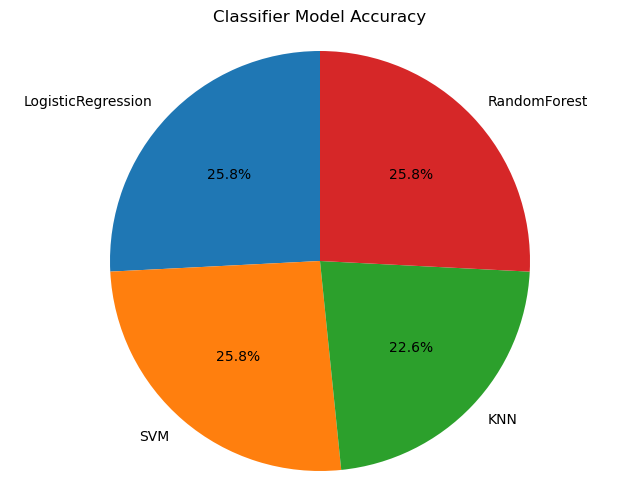

In [93]:
plt.figure(figsize=(8, 6))
plt.pie(score_df['Accuracy'], labels=score_df['Name'], autopct='%1.1f%%', startangle=90)
plt.title('Classifier Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

Logistic Regression, Support Vector Machine, and Random Forest all achieved perfect scores on the test dataset, while K Nearest Neighbors (KNN) had slightly lower accuracy and recall but still achieved perfect precision and F1 scores. Overall, all the models performed well on the test dataset.


<font color='green' size='5' face='verdana'>**CONCLUSIONS**</font>

<font color='navy' size='4'>**EFFECTIVENESS OF PREDICTING MODELS**</font>

When it comes to predicting floods based on rainfall data, the models—Logistic Regression, Support Vector Machine (SVM), K Nearest Neighbors (KNN), and Random Forest—show excellent accuracy, precision, recall, and F1 scores.SVM and logistic regression models function perfectly, exhibiting their effectiveness in flood prediction.Additionally, Random Forest performs exceptionally well, indicating that ensemble approaches are useful for capturing complex correlations in the data.
 

<font color='navy' size='4'>**EFFECTIVENESS OF CONDITIONAL PROBABILITY**</font>

The study focuses on utilizing conditional probability analysis to determine the possibility of flooding during the monsoon season. It involves gathering previous flood and rainfall data, figuring out conditional flooding probabilities, and classifying the information according to the strength of the rainfall. After that, a comparison of the data is made to see if a rainfall totaling more than 500 mm considerably raises the likelihood of flooding. The results are validated by past flood events and observations, and they are visually presented. The results have the potential to facilitate decision-making procedures for risk mitigation strategies, response planning, and flood preparedness. This strategy improves protection from flood risks.

<font color='navy' size='4'>**SIGNIFICANCE OF RAINFALL DATA IN FLOOD PREDICTION**</font>

The analysis highlights how important rainfall data are to flood prediction models.
The high connection between rainfall intensity and flood occurrence is demonstrated by the ability of models trained on rainfall data to distinguish between flood and non-flood events.

<font color='navy' size='4'>**SUGGESTIONS**</font>

Integration of More Features: Look into implementing other environmental, topographical, or socioeconomic elements that might have an impact on flood events.
More Complex Modeling Methods: Examine using ensemble approaches or advanced algorithms for machine learning to improve forecast stability and accuracy even more.
Real-Time Data Integration: To enable quick and detailed flood forecasts, develop methods to incorporate rainfall data in real-time or nearly real-time into the prediction models.
Regional Adaptation: To account for geographical changes in flood patterns and response approaches, consider adapting the models to particular regions or places.
